# Normalization and Preprocessing

### 14. Apply LabelEncoder, OneHotEncoder, and OrdinalEncoder to a sample dataset and compare the resulting feature space dimensions.


In [ ]:
# sample_data=({'color':['red','green','blue','green']})

In [10]:
sample_data=({'color':['red','green','blue','green']})
sample_data

{'color': ['red', 'green', 'blue', 'green']}

In [26]:
# LabelEncoder
import pandas as pd
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()

sample_data1 = pd.DataFrame(sample_data)

lbl_enc.fit(sample_data1)
sample_data1 = lbl_enc.transform(sample_data1)

sample_data1


D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2, 1, 0, 1])

In [21]:
# OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

sample_data2 = pd.DataFrame(sample_data)

sample_data2 = ord_enc.fit_transform(sample_data2)
sample_data2

array([[2.],
       [1.],
       [0.],
       [1.]])

In [17]:
# One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder(sparse_output = False)

sample_data3 = pd.DataFrame(sample_data)

sample_data3 = pd.DataFrame(one_hot_enc.fit_transform(sample_data3))
sample_data3

,0,1,2
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0


### 15. Apply both StandardScaler and MinMaxScaler on any numerical dataset and visualize the difference using boxplots. 

In [29]:
data = pd.read_csv("california_housing_train.csv")
data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0


In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = data.drop("median_house_value", axis =1)
y = data["median_house_value"]

#Standard Scaler
scalar_var = StandardScaler()
X_standard_scaler = pd.DataFrame(scalar_var.fit_transform(X), columns = X.columns)


#MinMaxscaler
scalar_minmax = MinMaxScaler()
X_minmax_scaler = pd.DataFrame(scalar_minmax.fit_transform(X), columns = X.columns)

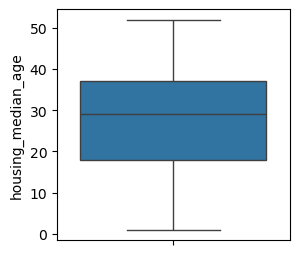

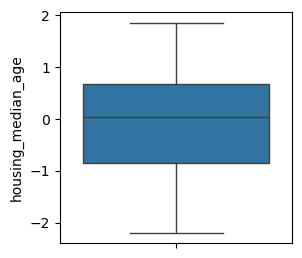

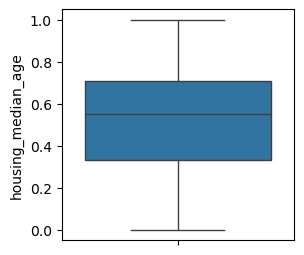

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (3,3))
sns.boxplot(X["housing_median_age"])
plt.show()
plt.figure(figsize = (3,3))
sns.boxplot(X_standard_scaler["housing_median_age"])
plt.show()
plt.figure(figsize = (3,3))
sns.boxplot(X_minmax_scaler["housing_median_age"])
plt.show()

### 16. Create equal-width and equal-frequency bins for an “Age” column in a dataset and visualize using histograms. 

In [45]:
# Age_column=[18,22,25,30,35,40,45,50,55,60]
Age_column=[18,22,25,30,35,40,45,50,55,60, 18, 18, 18, 18, 18, 70, 70]

# Equal width
Age_eq_width= pd.cut(Age_column, bins = 3, labels = ["GenZ", "GenY", "GenX"])
print(Age_eq_width.describe())

# Equal Frequency
Age_eq_freq= pd.qcut(Age_column, q = 3, labels = ["GenZ", "GenY", "GenX"])
print(Age_eq_freq.describe())

            counts     freqs
categories                  
GenZ            10  0.588235
GenY             3  0.176471
GenX             4  0.235294
            counts     freqs
categories                  
GenZ             6  0.352941
GenY             5  0.294118
GenX             6  0.352941


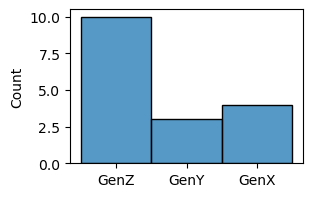

<Axes: ylabel='Count'>

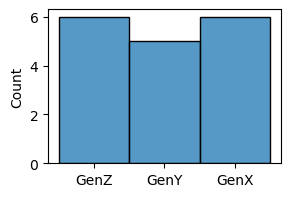

In [48]:
plt.figure(figsize= (3,2))
sns.histplot(Age_eq_width)
plt.show()
plt.figure(figsize= (3,2))
sns.histplot(Age_eq_freq)

### 17. Create custom bins for a “Salary” column — for example: Low (<30K), Medium (30K–70K), High (>70K) — and encode them using OrdinalEncoder. 

In [49]:
emp_salary= {"Employee":["Emp-1", "Emp-2", "Emp-3", "Emp-4", "Emp-5", "Emp-6", "Emp-7", "Emp-8"], "Salary":[10000, 20000, 35000, 45000, 50000, 56000, 67000, 76000]}
emp_salary = pd.DataFrame(emp_salary)
emp_salary

,Employee,Salary
0,Emp-1,10000
1,Emp-2,20000
2,Emp-3,35000
3,Emp-4,45000
4,Emp-5,50000
5,Emp-6,56000
6,Emp-7,67000
7,Emp-8,76000


In [52]:
# Custome bins
bins = [0, 30000, 70000, 100000]
emp_salary["salary_custom_bins"]= pd.cut(emp_salary["Salary"], bins = bins, labels = ["Low", "Medium", "High"])
print(emp_salary.value_counts())

Employee  Salary  salary_custom_bins
Emp-1     10000   Low                   1
Emp-2     20000   Low                   1
Emp-3     35000   Medium                1
Emp-4     45000   Medium                1
Emp-5     50000   Medium                1
Emp-6     56000   Medium                1
Emp-7     67000   Medium                1
Emp-8     76000   High                  1
Name: count, dtype: int64


In [54]:
emp_salary["salary_custom_bins"]

0       Low
1       Low
2    Medium
3    Medium
4    Medium
5    Medium
6    Medium
7      High
Name: salary_custom_bins, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [55]:
emp_salary

,Employee,Salary,salary_custom_bins
0,Emp-1,10000,Low
1,Emp-2,20000,Low
2,Emp-3,35000,Medium
3,Emp-4,45000,Medium
4,Emp-5,50000,Medium
5,Emp-6,56000,Medium
6,Emp-7,67000,Medium
7,Emp-8,76000,High


In [60]:
# OrdinalEncoder
ord_enc = OrdinalEncoder()
emp_salary["encoded_salary_bin"] = ord_enc.fit_transform(emp_salary[["salary_custom_bins"]])
print(emp_salary.value_counts())

Employee  Salary  salary_custom_bins  encoded_salary_bin
Emp-1     10000   Low                 1.0                   1
Emp-2     20000   Low                 1.0                   1
Emp-3     35000   Medium              2.0                   1
Emp-4     45000   Medium              2.0                   1
Emp-5     50000   Medium              2.0                   1
Emp-6     56000   Medium              2.0                   1
Emp-7     67000   Medium              2.0                   1
Emp-8     76000   High                0.0                   1
Name: count, dtype: int64
